In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
file_path = r"C:\Users\stewi\Downloads\yahoo_data.xlsx"
data = pd.read_excel(file_path)

In [3]:
data

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000
...,...,...,...,...,...,...,...
1253,"May 07, 2018",24317.66,24479.45,24263.42,24357.32,24357.32,307670000
1254,"May 04, 2018",23865.22,24333.35,23778.87,24262.51,24262.51,329480000
1255,"May 03, 2018",23836.23,23996.15,23531.31,23930.15,23930.15,389240000
1256,"May 02, 2018",24097.63,24185.52,23886.30,23924.98,23924.98,385350000


In [4]:
#Convert Date Column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors ='coerce')

In [5]:
data.dropna(inplace=True)

In [6]:
# Calculate the daily return as (Close - Open) / Open
data['Daily_Return'] = (data['Close*'] - data['Open']) / data['Open']

In [7]:
#This is the target variable where 1 indicates a positive return (price increase) and 0 otherwise (Price Decrease/Unchanged)
data['Target'] = (data['Daily_Return'] > 0).astype(int)

In [8]:
data

,Date,Open,High,Low,Close*,Adj Close**,Volume,Daily_Return,Target
0,2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000,0.008898,1
1,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000,0.013316,1
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000,-0.008765,0
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000,-0.008795,0
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000,0.002081,1
...,...,...,...,...,...,...,...,...,...
1253,2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000,0.001631,1
1254,2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000,0.016647,1
1255,2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000,0.003940,1
1256,2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000,-0.007165,0


In [9]:
# Limiting the dataset for a faster model run
data_small = data.sample(n=500, random_state=42)

#Features and Target
features_small = data_small[['Open', 'High', 'Low', 'Close*', 'Volume']]
target_small = data_small['Target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features_small, target_small, test_size=.2, random_state=42)

In [22]:
#XGBoost Classifier 
XGSmodel = xgb.XGBClassifier(eval_metric='logloss', n_estimators=50, max_depth=5)

XGSmodel.fit(X_train, y_train,
         eval_set=[(X_test, y_test)],
         verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [24]:
#Test set predictions
y_pred = XGSmodel.predict(X_test)

#Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#print
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.71
Precision: 0.7924528301886793
Recall: 0.7
F1 Score: 0.7433628318584071


<Figure size 1000x600 with 0 Axes>

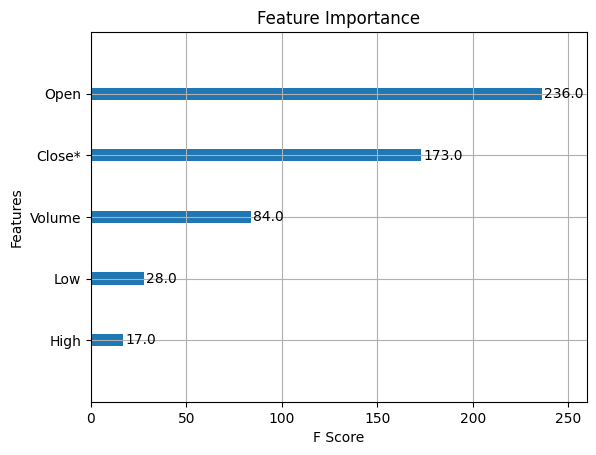

<Figure size 600x600 with 0 Axes>

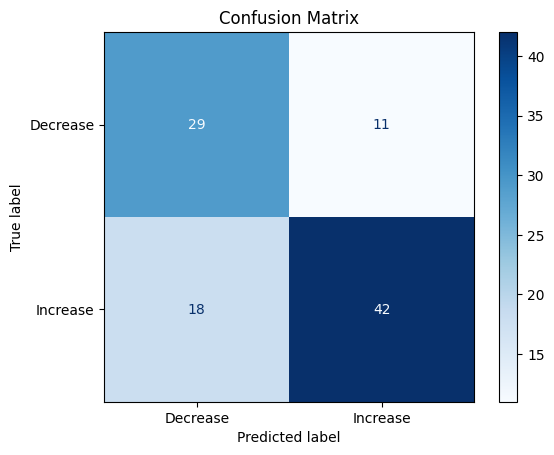

In [31]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(XGSmodel, importance_type='weight', title='Feature Importance', xlabel='F Score')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay.from_estimator(XGSmodel, X_test, y_test, cmap="Blues", display_labels=["Decrease", "Increase"])
plt.title("Confusion Matrix")
plt.show()